In [80]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import statistics

functions needed

In [4]:
def expo(lam, x):
  return 1 - math.exp(-1 * lam * x)

def pareto(a, b, x):
  return 1 - ((1+x/b)**(-a))

def add_chart(x, y, title):
  f1 = plt.figure()
  ax1 = f1.add_subplot(111)
  ax1.plot(x, y)
  ax1.set_title(title)

def mean_2d(arr):
  return [sum(arr[i])/(len(arr[i])) for i in range(len(arr))]


def for passive answers

In [5]:
def ans_for_passive(n,itr,lifetime,expo=True):
    T_k = [[0 for _ in range(1)] for _ in range(n)] 
    #note: the highest possible degree is n-1 + we aren't always going to have a node with every possible degree in the graphs

    phi_k = [0 for _ in range(n)]
    phi_li = [0 for _ in range(n)]
    phis = []
    Ephi = []
    for it in range(itr):
        seed = random.randint(100, 100000)
        p = random.uniform(0,1)
        G = nx.gnp_random_graph(n, p, seed=seed)
        initial_degrees = list(G.degree())
        phi = 0
        for i in range(n):
            if i < n-1 and lifetime[i] == lifetime[i+1]: #reached where lifetimes are all 1 from now on 
                for j in range(i, n):
                    if j not in G:
                        continue
                    T_k[initial_degrees[j][1]].append(lifetime[j]) #if node dies before being isolated, T = lifetime of node
                break

            #havent reached where lifetimes are 1 
            if i not in G:
                continue
            G.remove_node(i)
            T_k[initial_degrees[i][1]].append(lifetime[i]) #if node dies before being isolated, T = lifetime of node
            isolatedNodes = list(nx.isolates(G))
            if len(isolatedNodes) > 0:
                phi = 1
                G.remove_nodes_from(isolatedNodes)
                for isolnode in isolatedNodes:
                    ind = initial_degrees[isolnode][1] #ind = k of the isolated node
                    T_k[ind].append(lifetime[i]) #T = lifetime of the node that caused isolation
                    phi_k[ind] += 1
                    phi_li[i] += 1
        phis.append(phi)
        Ephi.append(np.mean(phis))

    ET_k = mean_2d(T_k)
    f1 = plt.figure()
    ax1 = f1.add_subplot(111)
    ax1.plot(range(n), ET_k)
    ax1.set_title("average T for each node degree (passive)")
    plt.xlabel('k')
    plt.ylabel('average T')

    phi_k = [x / itr for x in phi_k]
    f1 = plt.figure()
    ax1 = f1.add_subplot(111)
    ax1.plot(range(n), phi_k)
    ax1.set_title("node isolation probability for each node degree (passive)")
    plt.xlabel('k')
    plt.ylabel('node isolation probability')

    phi_li = [x / itr for x in phi_li]
    f1 = plt.figure()
    ax1 = f1.add_subplot(111)
    plt.scatter(lifetime, phi_li)
    ax1.set_title("node isolation probability for each node lifetime (passive)")
    plt.xlabel('lifetime')
    plt.ylabel('node isolation probability')

    f1 = plt.figure()
    ax1 = f1.add_subplot(111)
    ax1.plot(range(itr), Ephi)
    if expo == True:
        ax1.set_title("graph isolation probability - nodes with expo lifetimes (passive)")
    else:
        ax1.set_title("graph isolation probability - nodes with pareto lifetimes (passive)")
    plt.xlabel('iteration')
    plt.ylabel('phi')

expo lifetimes + passive

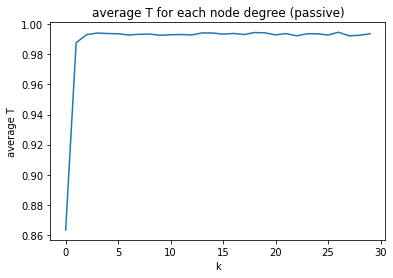

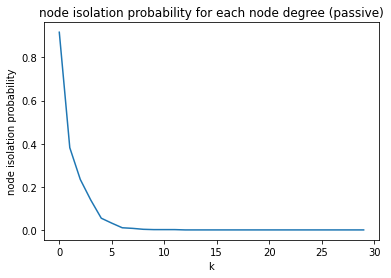

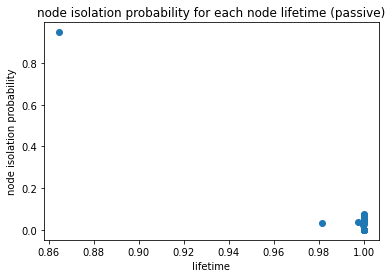

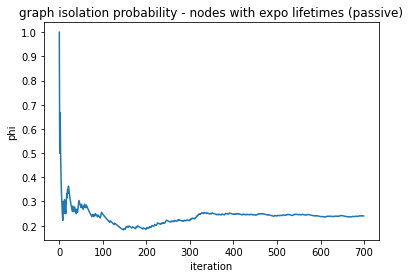

In [6]:
n = 30 #(1 - math.exp(-40)) = 1 => every node with index higher than 19 will all be destroyed at 1s
lambdaa = 2
itr = 700

lifetime = [expo(lambdaa, i) for i in range(1, n+1)] #1,2,...,n
ans_for_passive(n,itr,lifetime)

pareto lifetimes + passive

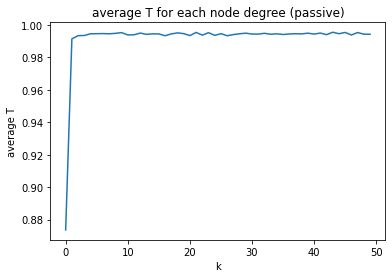

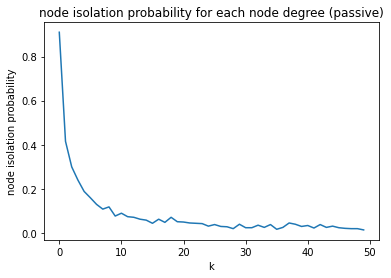

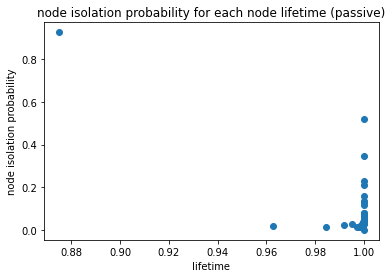

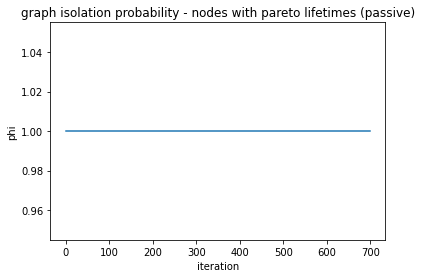

In [7]:
n = 50
a = 3
b = 1
itr = 700

lifetime = [pareto(a,b,i) for i in range(1, n+1)] #1,2,...,n
ans_for_passive(n,itr,lifetime,False)

برای قسمت ه با توزیع پارتو و غیرفعال

Text(0, 0.5, 'average T')

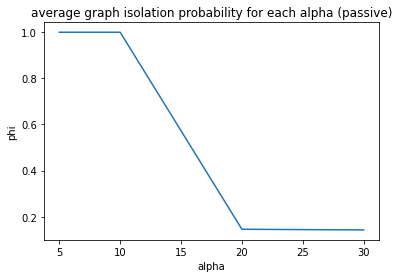

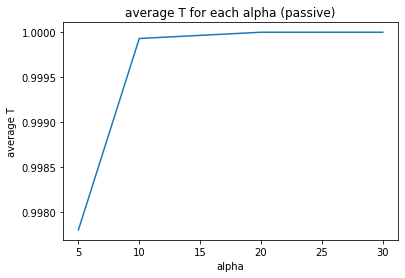

In [8]:
num = 30
beta = 1
itr = 700
alphas = [5,10,20,30]

Ephi = []
ET = []
for alpha in alphas:
    lifetime = [pareto(alpha,beta,i) for i in range(1, num+1)] #1,2,...,n
    T = []
    phis = []

    for it in range(itr):
        seed = random.randint(100, 100000)
        p = random.uniform(0,1)
        G = nx.gnp_random_graph(num, p, seed=seed)
        phi = 0
        for i in range(num):
            if i < num-1 and lifetime[i] == lifetime[i+1]: #reached where lifetimes are all 1 from now on 
                for j in range(i, n):
                    if j not in G:
                        continue
                    T.append(lifetime[j]) #if node dies before being isolated, T = lifetime of node
                break
            if i not in G:
                continue
            G.remove_node(i)
            T.append(lifetime[i]) #if node dies before being isolated, T = lifetime of node
            isolatedNodes = list(nx.isolates(G))
            if len(isolatedNodes) > 0:
                phi = 1
                G.remove_nodes_from(isolatedNodes)
                for isolnode in isolatedNodes:
                    T.append(lifetime[i]) #T = lifetime of the node that caused isolation
        phis.append(phi)
    Ephi.append(np.mean(phis))
    ET.append(np.mean(T))

f1 = plt.figure()
ax1 = f1.add_subplot(111)
ax1.plot(alphas, Ephi)
ax1.set_title("average graph isolation probability for each alpha (passive)")
plt.xlabel('alpha')
plt.ylabel('phi')

f1 = plt.figure()
ax1 = f1.add_subplot(111)
ax1.plot(alphas, ET)
ax1.set_title("average T for each alpha (passive)")
plt.xlabel('alpha')
plt.ylabel('average T')


In [103]:
def ans_for_active(n,itr,lifetime):
    max_time = 1000
    lifetime = [x*max_time/10 for x in lifetime]
    Si = [0.1,0.5,1,10,20,40]
    T_k = [[0 for _ in range(1)] for _ in range(n)]
    #note: the highest possible degree is n-1 + we aren't always going to have a node with every possible degree in the graphs

    phi_k = [0 for _ in range(n)]
    phi_li = [0 for _ in range(n)]

    Ephi_ES = []
    ETs_ES = []

    for cur_si in Si:
        phis = []
        ETs_Si = []
        for it in range(itr):
            p = random.uniform(0,1)
            G = nx.gnp_random_graph(n, p)
            initial_degrees = list(G.degree())
            Ts = [0 if initial_degrees[node][1] == 0 else max_time for node in range(n)]
            rem_si = [[0 for _ in range(1)] for _ in range(n)]
            phi = 0
            
            for i in range(n):
                if i < n-1 and lifetime[i] == lifetime[i+1]: #reached where lifetimes are all 1 from now on 
                    for j in range(i, n):
                        if j not in G:
                            continue
                        if Ts[j] == max_time:
                            Ts[j] = lifetime[j]
                            T_k[initial_degrees[j][1]].append(lifetime[j]) #if node dies before being isolated, T=lifetime of node
                    break

                #havent reached where lifetimes are 1 
                if i not in G:
                    continue
                
                if i != 0:
                    time_passed = lifetime[i] - lifetime[i-1]
                    for searching_node_i in range(len(rem_si)):
                        si = 1
                        while si < len(rem_si[searching_node_i]):
                            rem_si[searching_node_i][si] -= time_passed
                            if rem_si[searching_node_i][si] <= 0:
                                del rem_si[searching_node_i][si]
                                random_node = random.sample(G.nodes,1)
                                G.add_edge(searching_node_i, random_node[0])
                                si -= 1
                            si += 1

                i_neigh = list(G.neighbors(i))
                for neigh in i_neigh:
                    rem_si[neigh].append(cur_si)

                # print(rem_si)

                G.remove_node(i)
                if Ts[i] == max_time:
                    T_k[initial_degrees[i][1]].append(lifetime[i]) #if node dies before being isolated, T = lifetime of node
                    Ts[i] = lifetime[i]

                isolatedNodes = list(nx.isolates(G))
                if len(isolatedNodes) > 0:
                    for isolnode in isolatedNodes:
                        if Ts[isolnode] == max_time: #the first time that the node is isolated
                            phi = 1
                            Ts[isolnode] = lifetime[i]
                            T_k[initial_degrees[i][1]].append(lifetime[i])
                            phi_k[initial_degrees[i][1]] += 1
                            phi_li[isolnode] += 1
            ETs_Si.append(statistics.mean(Ts))
            phis.append(phi)
        ETs_ES.append(np.mean(ETs_Si))
        Ephi_ES.append(np.mean(phis))

    ET_k = mean_2d(T_k)
    f1 = plt.figure()
    ax1 = f1.add_subplot(111)
    ax1.plot(range(n), ET_k)
    ax1.set_title("average T for each node degree (active)")
    plt.xlabel('k')
    plt.ylabel('average T')

    phi_k = [x / (itr*len(Si)) for x in phi_k]
    f1 = plt.figure()
    ax1 = f1.add_subplot(111)
    ax1.plot(range(n), phi_k)
    ax1.set_title("node isolation probability for each node degree (active)")
    plt.xlabel('k')
    plt.ylabel('node isolation probability')

    phi_li = [x / (itr*len(Si)) for x in phi_li]
    f1 = plt.figure()
    ax1 = f1.add_subplot(111)
    plt.scatter(lifetime, phi_li)
    ax1.set_title("node isolation probability for each node lifetime (active)")
    plt.xlabel('lifetime')
    plt.ylabel('node isolation probability')

    f1 = plt.figure()
    ax1 = f1.add_subplot(111)
    ax1.plot(Si, ETs_ES)
    ax1.set_title("average T for each search time (active)")
    plt.xlabel('E[S]')
    plt.ylabel('E[T]')

    f1 = plt.figure()
    ax1 = f1.add_subplot(111)
    ax1.plot(Si, Ephi_ES)
    ax1.set_title("graph isolation probability for each search time (active)")
    plt.xlabel('E[S]')
    plt.ylabel('phi')

C:\Users\Ramtin\AppData\Local\Temp\ipykernel_14764\635788980.py:47: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_node = random.sample(G.nodes,1)


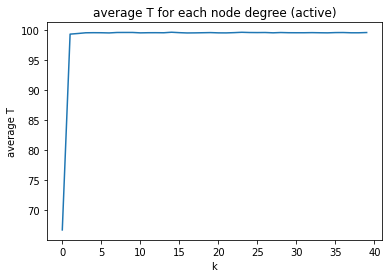

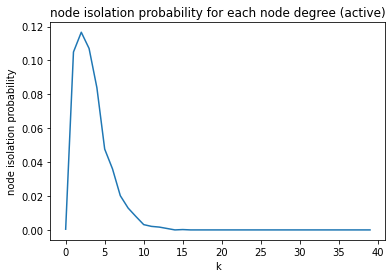

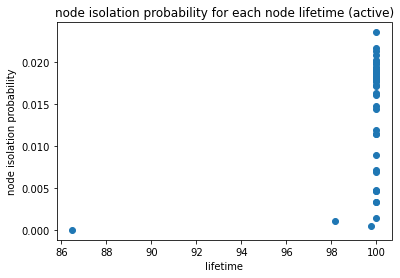

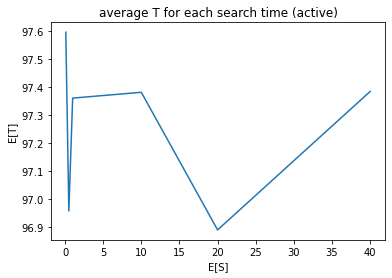

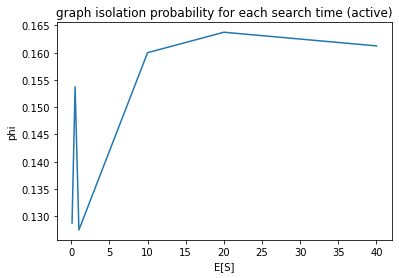

In [104]:
n = 40
lambdaa = 2
itr = 800

lifetime = [expo(lambdaa, i) for i in range(1, n+1)] #1,2,...,n
ans_for_active(n, itr, lifetime)

C:\Users\Ramtin\AppData\Local\Temp\ipykernel_14764\635788980.py:47: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_node = random.sample(G.nodes,1)


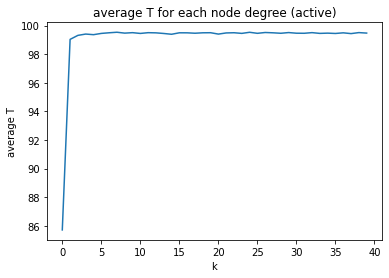

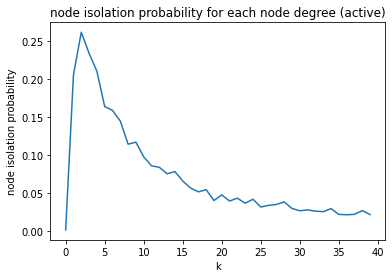

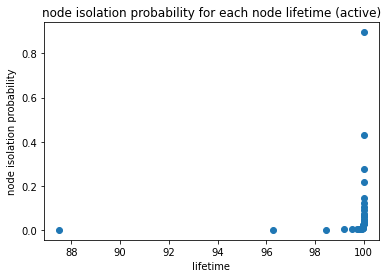

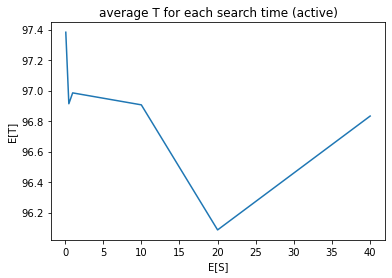

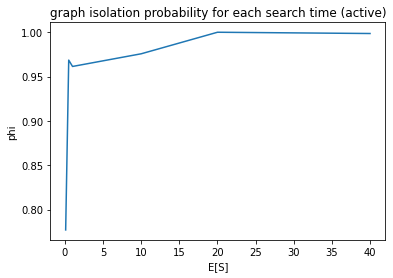

In [105]:
n = 40
a = 3
b = 1
itr = 700

lifetime = [pareto(a,b,i) for i in range(1, n+1)] #1,2,...,n
ans_for_active(n, itr, lifetime)